<a href="https://colab.research.google.com/github/awaiskhan005/DATA-SCIENCE-AND-AI-/blob/main/SEARCH_INTREST_PREDICTVE_mdoel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas  as pd
import numpy as np


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.io as pio

In [3]:
df = pd.read_csv('/content/drive/MyDrive/multiTimeline (1).csv')

In [4]:
df.head()

,Category: Business & Industrial
Month,Microsoft Power BI: (Worldwide)
2004-01,0
2004-02,0
2004-03,0
2004-04,0


In [5]:
df.tail()

,Category: Business & Industrial
2024-09,90
2024-10,89
2024-11,85
2024-12,73
2025-01,80


In [7]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/multiTimeline (1).csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand the structure
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 254 entries, Month to 2025-01
Data columns (total 1 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Category: Business & Industrial  254 non-null    object
dtypes: object(1)
memory usage: 4.0+ KB


(         Category: Business & Industrial
 Month    Microsoft Power BI: (Worldwide)
 2004-01                                0
 2004-02                                0
 2004-03                                0
 2004-04                                0,
 None)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Search_Interest'], label='Search Interest', color='blue')
plt.title('Search Interest Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Search Interest', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# Check for stationarity using rolling statistics
rolling_mean = data['Search_Interest'].rolling(window=12).mean()
rolling_std = data['Search_Interest'].rolling(window=12).std()

plt.figure(figsize=(12, 6))
plt.plot(data['Search_Interest'], label='Original', color='blue')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std Dev', color='black')
plt.title('Rolling Mean & Standard Deviation', fontsize=16)
plt.legend(loc='best')
plt.show()


KeyError: 'Search_Interest'

<Figure size 1200x600 with 0 Axes>

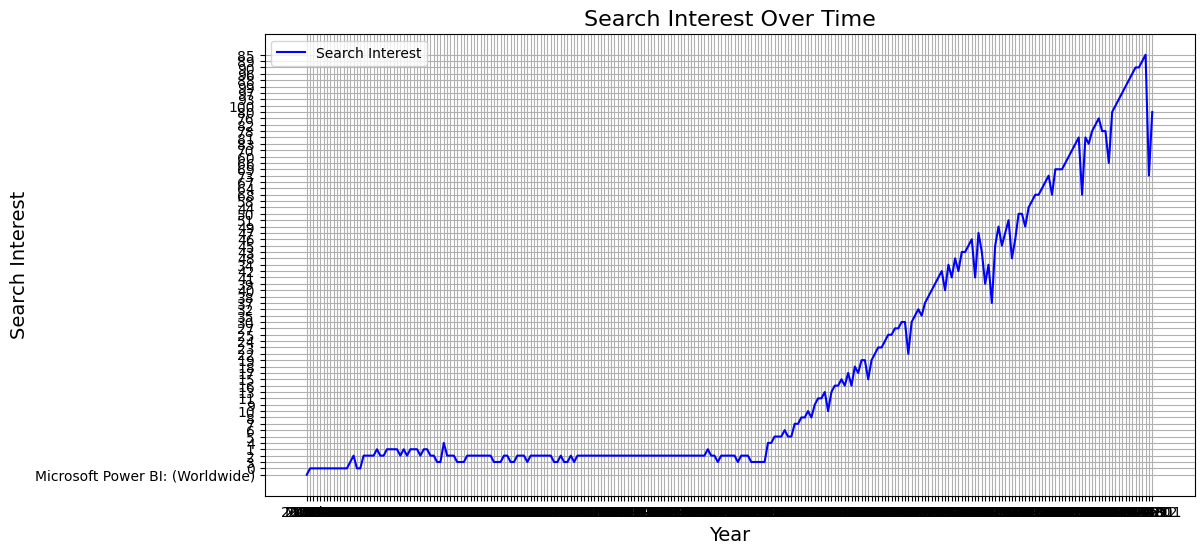

DataError: No numeric types to aggregate

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the first column contains the search interest data
# and it's unnamed, you can access it using its index (0)
search_interest_column = data.columns[0]  # Get the name of the first column

# Plot the time series
plt.figure(figsize=(12, 6))
# Use the retrieved column name instead of 'Search_Interest'
plt.plot(data.index, data[search_interest_column], label='Search Interest', color='blue')
plt.title('Search Interest Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Search Interest', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# Check for stationarity using rolling statistics
rolling_mean = data[search_interest_column].rolling(window=12).mean()  # Use the retrieved column name
rolling_std = data[search_interest_column].rolling(window=12).std()  # Use the retrieved column name

plt.figure(figsize=(12, 6))
plt.plot(data[search_interest_column], label='Original', color='blue')  # Use the retrieved column name
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std Dev', color='black')
plt.title('Rolling Mean & Standard Deviation', fontsize=16)
plt.legend(loc='best')
plt.show()

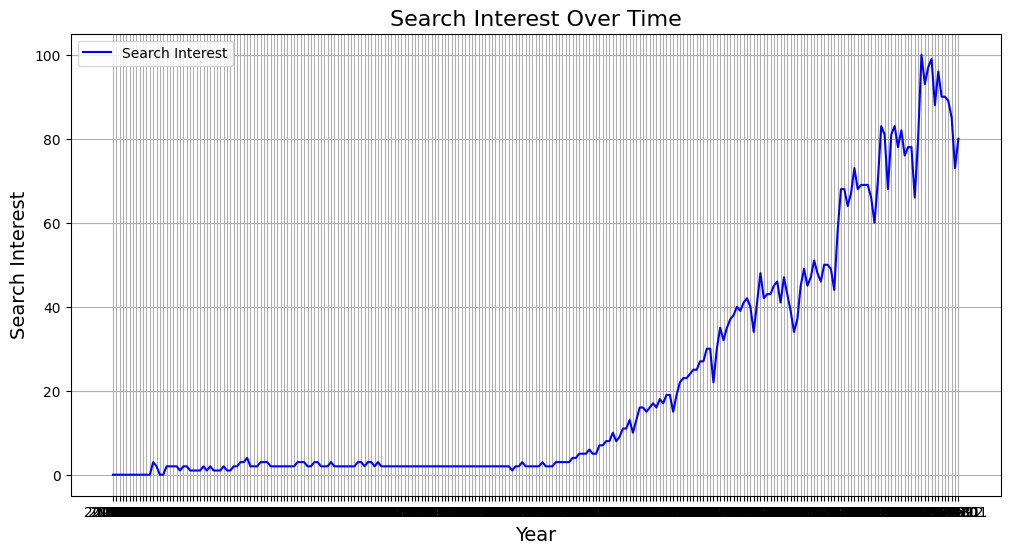

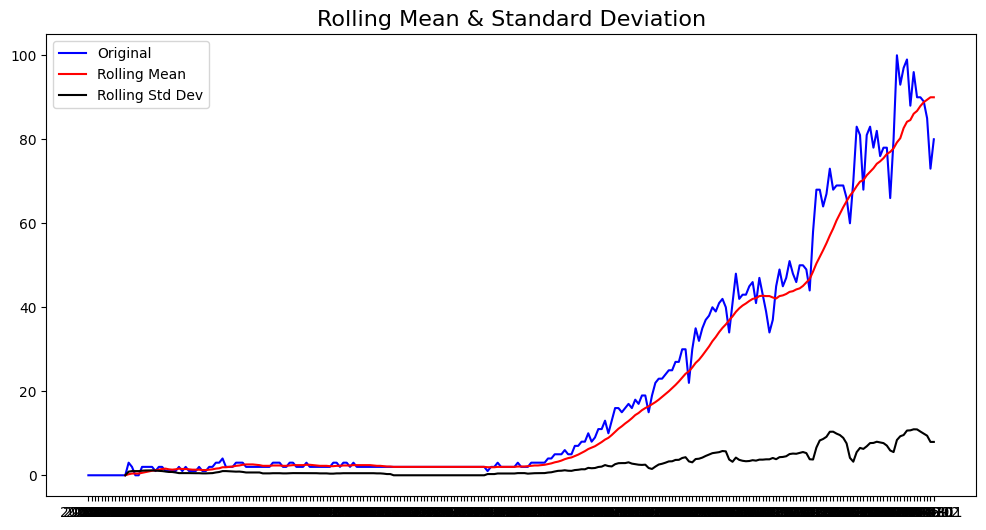

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the first column contains the search interest data
# and it's unnamed, you can access it using its index (0)
search_interest_column = data.columns[0]  # Get the name of the first column

# Convert the 'search_interest_column' to numeric, handling errors
data[search_interest_column] = pd.to_numeric(data[search_interest_column], errors='coerce')

# Drop rows with NaN values (introduced by 'coerce') if necessary
data = data.dropna()


# Plot the time series
plt.figure(figsize=(12, 6))
# Use the retrieved column name instead of 'Search_Interest'
plt.plot(data.index, data[search_interest_column], label='Search Interest', color='blue')
plt.title('Search Interest Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Search Interest', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# Check for stationarity using rolling statistics
rolling_mean = data[search_interest_column].rolling(window=12).mean()  # Use the retrieved column name
rolling_std = data[search_interest_column].rolling(window=12).std()  # Use the retrieved column name

plt.figure(figsize=(12, 6))
plt.plot(data[search_interest_column], label='Original', color='blue')  # Use the retrieved column name
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std Dev', color='black')
plt.title('Rolling Mean & Standard Deviation', fontsize=16)
plt.legend(loc='best')
plt.show()

In [12]:
from statsmodels.tsa.stattools import adfuller

# Get the name of the first column (which should contain search interest)
search_interest_column = data.columns[0]

# Perform Augmented Dickey-Fuller test
adf_test = adfuller(data[search_interest_column])  # Use the retrieved column name

# Extract results
adf_results = {
    'Test Statistic': adf_test[0],
    'p-value': adf_test[1],
    'Lags Used': adf_test[2],
    'Number of Observations': adf_test[3],
    'Critical Values': adf_test[4],
}

adf_results

{'Test Statistic': 0.5747904201602981,
 'p-value': 0.98697748959761,
 'Lags Used': 13,
 'Number of Observations': 239,
 'Critical Values': {'1%': -3.458010773719797,
  '5%': -2.8737103617125186,
  '10%': -2.5732559963936206}}

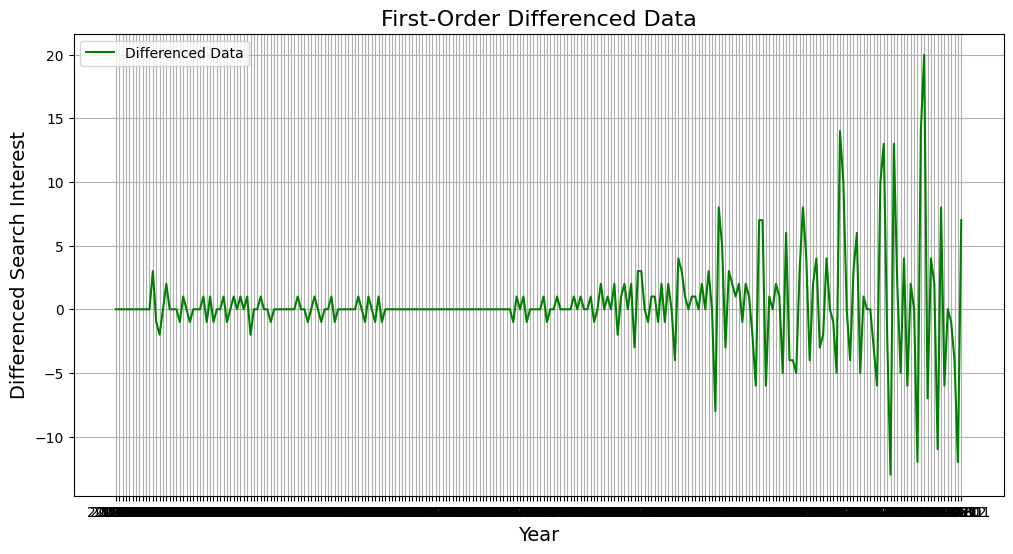

{'Test Statistic': -2.4312919504607904,
 'p-value': 0.13309853168680474,
 'Lags Used': 16,
 'Number of Observations': 235,
 'Critical Values': {'1%': -3.4584868856997004,
  '5%': -2.873918902362675,
  '10%': -2.573367247623359}}

In [14]:
# Apply first-order differencing
# Use the retrieved column name (search_interest_column) instead of 'Search_Interest'
data_diff = data[search_interest_column].diff().dropna()

# Perform ADF test on differenced data
adf_test_diff = adfuller(data_diff)

# Extract results
adf_results_diff = {
    'Test Statistic': adf_test_diff[0],
    'p-value': adf_test_diff[1],
    'Lags Used': adf_test_diff[2],
    'Number of Observations': adf_test_diff[3],
    'Critical Values': adf_test_diff[4],
}

# Plot the differenced data
plt.figure(figsize=(12, 6))
plt.plot(data_diff, label='Differenced Data', color='green')
plt.title('First-Order Differenced Data', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Differenced Search Interest', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

adf_results_diff

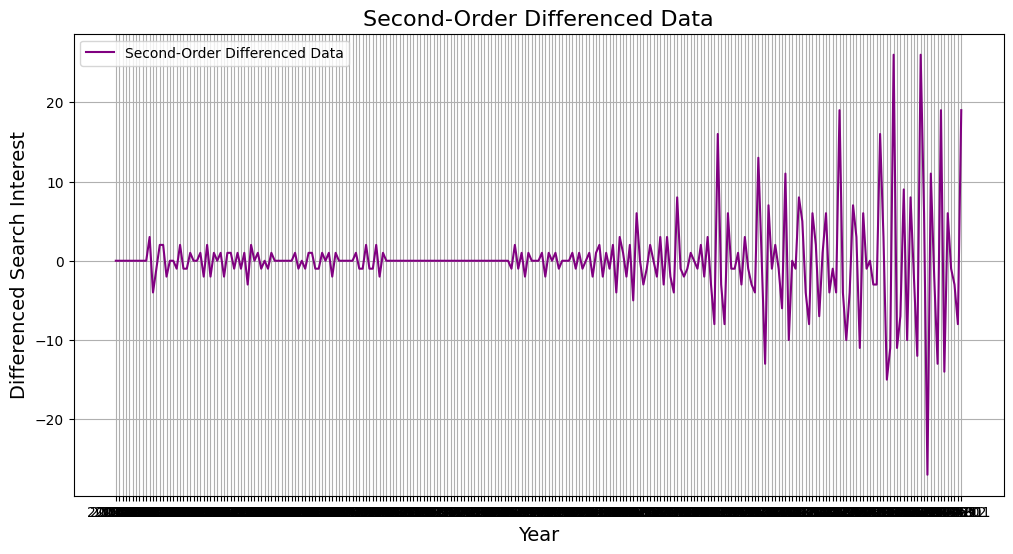

{'Test Statistic': -5.261258104945267,
 'p-value': 6.58361881512923e-06,
 'Lags Used': 15,
 'Number of Observations': 235,
 'Critical Values': {'1%': -3.4584868856997004,
  '5%': -2.873918902362675,
  '10%': -2.573367247623359}}

In [15]:
# Apply second-order differencing
data_diff2 = data_diff.diff().dropna()

# Perform ADF test on second-order differenced data
adf_test_diff2 = adfuller(data_diff2)

# Extract results
adf_results_diff2 = {
    'Test Statistic': adf_test_diff2[0],
    'p-value': adf_test_diff2[1],
    'Lags Used': adf_test_diff2[2],
    'Number of Observations': adf_test_diff2[3],
    'Critical Values': adf_test_diff2[4],
}

# Plot the second-order differenced data
plt.figure(figsize=(12, 6))
plt.plot(data_diff2, label='Second-Order Differenced Data', color='purple')
plt.title('Second-Order Differenced Data', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Differenced Search Interest', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

adf_results_diff2


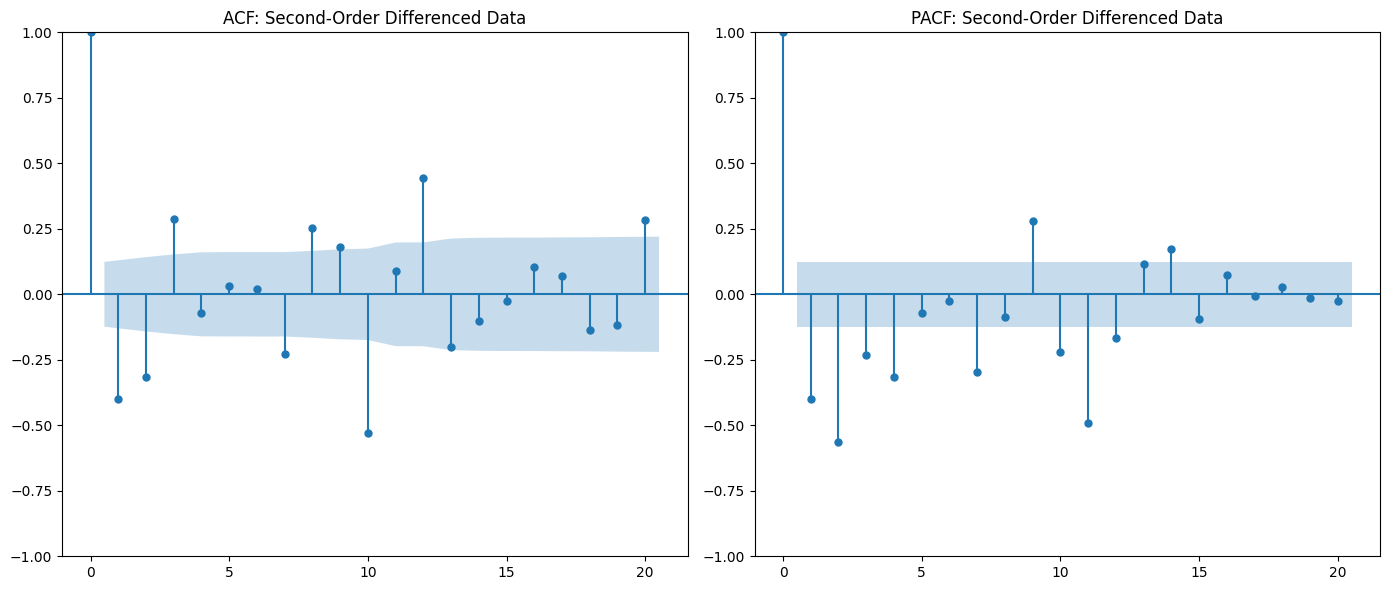

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for the second-order differenced data
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plot_acf(data_diff2, lags=20, ax=plt.gca(), title='ACF: Second-Order Differenced Data')
plt.subplot(1, 2, 2)
plot_pacf(data_diff2, lags=20, ax=plt.gca(), title='PACF: Second-Order Differenced Data')
plt.tight_layout()
plt.show()


In [18]:
from statsmodels.tsa.arima.model import ARIMA

# Get the name of the first column (which contains search interest)
search_interest_column = data.columns[0]

# Fit the ARMA model (assuming ARMA is a subset of ARIMA with d=0)
# Using a simple configuration (p=1, q=1) as a starting point
# Use the search_interest_column variable instead of 'Search_Interest'
arma_model = ARIMA(data[search_interest_column], order=(1, 2, 1))
arma_result = arma_model.fit()

# Summary of the ARMA model
arma_result.summary()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:     Category: Business & Industrial   No. Observations:                  253
Model:                              ARIMA(1, 2, 1)   Log Likelihood                -675.125
Date:                             Thu, 16 Jan 2025   AIC                           1356.250
Time:                                     12:33:05   BIC                           1366.826
Sample:                                 01-01-2004   HQIC                          1360.506
                                      - 01-01-2025                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1415      0.030     -4.718      0.000      -0.200      -0.083
ma.L1         -0.9927      0.009   -111.968      0.000      -1.010      -0.975
sigma2        12.4752      0.525     23.748      0.000      11.446      13.505
===================================================================================
Ljung-Box (L1) (Q):                   0.88   Jarque-Bera (JB):               906.71
Prob(Q):                              0.35   Prob(JB):                         0.00
Heteroskedasticity (H):              65.27   Skew:                             0.86
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Scale the data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Search_Interest']])

# Prepare training and testing data
train_size = int(len(scaled_data) * 0.8)
train, test = scaled_data[:train_size], scaled_data[train_size:]

# Create LSTM-compatible sequences
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(x), np.array(y)

seq_length = 12  # Use past 12 months to predict the next month
x_train, y_train = create_sequences(train, seq_length)
x_test, y_test = create_sequences(test, seq_length)

x_train.shape, y_train.shape, x_test.shape, y_test.shape


KeyError: "None of [Index(['Search_Interest'], dtype='object')] are in the [columns]"

In [20]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Scale the data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))

# Get the name of the first column (which should contain search interest)
search_interest_column = data.columns[0]

# Use the correct column name when scaling
scaled_data = scaler.fit_transform(data[[search_interest_column]])

# Prepare training and testing data
train_size = int(len(scaled_data) * 0.8)
train, test = scaled_data[:train_size], scaled_data[train_size:]

# Create LSTM-compatible sequences
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(x), np.array(y)

seq_length = 12  # Use past 12 months to predict the next month
x_train, y_train = create_sequences(train, seq_length)
x_test, y_test = create_sequences(test, seq_length)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((190, 12, 1), (190, 1), (39, 12, 1), (39, 1))

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 0.0203 - val_loss: 0.3317
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0133 - val_loss: 0.1942
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0078 - val_loss: 0.0248
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0012 - val_loss: 0.1943
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 8.2944e-04 - val_loss: 0.0403
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.8755e-04 - val_loss: 0.0295
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 6.9772e-04 - val_loss: 0.0498
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 8.4872e-04 - val_loss: 0.0134
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0011 - val_loss: 0.0265
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.4130e-04 - val_loss: 0.0303
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.4930e-04 - val_loss: 0.0120
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/ste

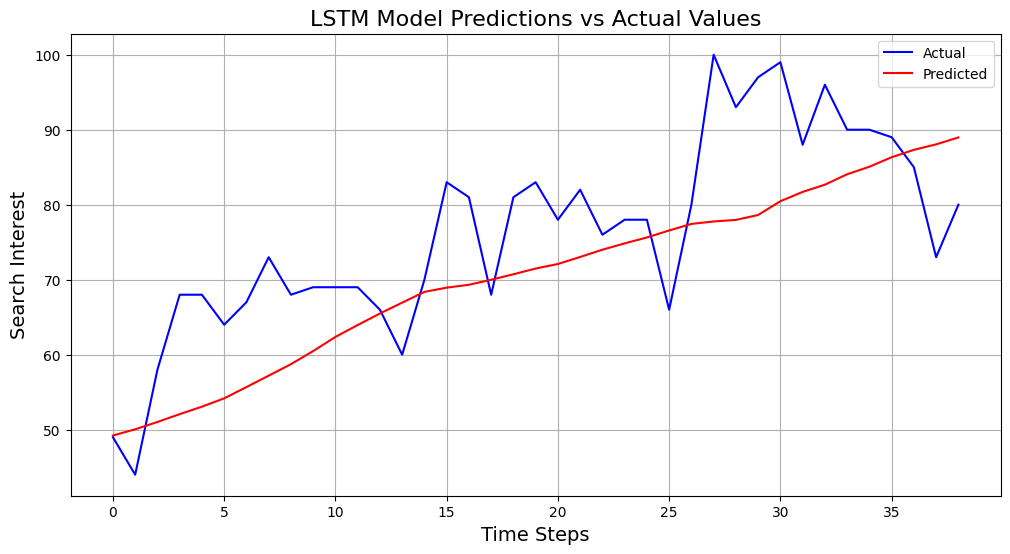

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build the LSTM model
lstm_model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(50, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = lstm_model.fit(x_train, y_train, epochs=50, batch_size=16, validation_data=(x_test, y_test), verbose=1)

# Predict on test data
lstm_predictions = lstm_model.predict(x_test)

# Invert scaling to get predictions in the original scale
lstm_predictions_original = scaler.inverse_transform(lstm_predictions)
y_test_original = scaler.inverse_transform(y_test)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label='Actual', color='blue')
plt.plot(lstm_predictions_original, label='Predicted', color='red')
plt.title('LSTM Model Predictions vs Actual Values', fontsize=16)
plt.xlabel('Time Steps', fontsize=14)
plt.ylabel('Search Interest', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


In [22]:
# Prepare the last sequence from the test data
last_sequence = scaled_data[-seq_length:]
last_sequence = last_sequence.reshape((1, seq_length, 1))  # Reshape for LSTM input

# Predict the next day's value
next_day_scaled = lstm_model.predict(last_sequence)

# Invert scaling to get the original value
next_day_original = scaler.inverse_transform(next_day_scaled)

# Display the prediction
print(f"Predicted value for the next day: {next_day_original[0][0]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted value for the next day: 88.77
